<a href="https://colab.research.google.com/github/tb-harris/neuroscience-2024/blob/main/05_Transcriptomics_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup
Let's load in Google Drive and our morphological + transcriptomics dataset:

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Read in our morph + genetic data
cell_data = pd.read_hdf('/content/drive/Shareddrives/Lisman Laboratory/Lisman 2024/Neuro/Data/processed data/genes_morph.hdf5.lz4')
# Create dataframes with just the gene and morph data
gene_data = cell_data.iloc[:, :-24] # all rows, all columns from start until 24th-to-last
# Puts the last 24 cols into a morph_data dataframe
morph_data = cell_data.iloc[:, -24:] # all rows, all columns from 24-th-to-last to end


Mounted at /content/drive


## Looking at 0 counts in our gene data

In [3]:
cell_data['Slc17a7']

cell_specimen_id
601506507      0.000000
601790961      0.000000
601803754     44.173889
601808698      0.000000
601810307     32.414175
                ...    
963055521    832.277574
963063283    321.376736
992386952      0.000000
992268582      0.000000
992830261      0.000000
Name: Slc17a7, Length: 573, dtype: float64

In [4]:
import seaborn as sns

<Axes: xlabel='Slc17a7', ylabel='Count'>

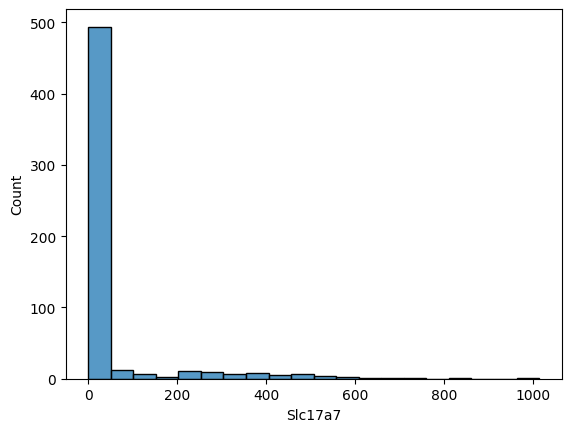

In [6]:
sns.histplot(cell_data['Slc17a7'], bins=20)

It looks like we have a lot of values that are 0 or close to 0 -- let's find out the exact proportion

In [11]:

(cell_data['Slc17a7'] == 0).value_counts()

Slc17a7
True     310
False    263
Name: count, dtype: int64

310 of our cells have 0 values for this particular gene.

It looks like we have a lot of zero values and also a lot of values that are close to 0 -- let's get a closer idea of what the distribution between 0 and 50 looks like:

[(0.0, 50.0),
 Text(0.5, 1.0, 'Distribution of Slc17a7 gene counts (0 to 50 only)')]

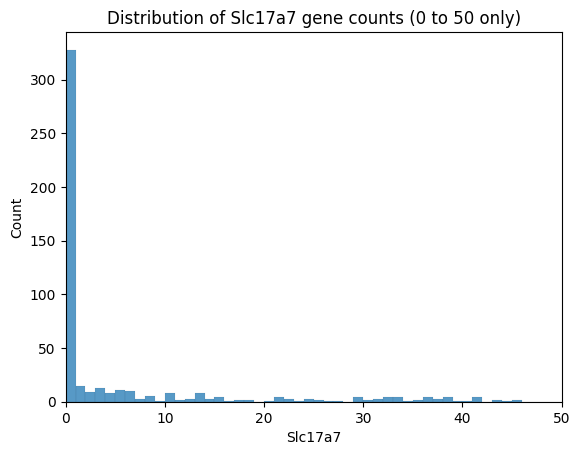

In [16]:
sns.histplot(cell_data['Slc17a7'], binwidth=1).set(xlim=[0, 50], title="Distribution of Slc17a7 gene counts (0 to 50 only)")

## What % of genes are measured as expressed across cells?

In [20]:
# Counts how many genes have expression values of greater than 0 in each cell
genes_expressed_by_cell = (gene_data > 0).sum(axis='columns')
genes_expressed_by_cell

cell_specimen_id
601506507     5724
601790961     2568
601803754     7322
601808698     8086
601810307     7321
             ...  
963055521     7948
963063283     8259
992386952     7892
992268582     8171
992830261    10468
Length: 573, dtype: int64

In [21]:
# Get the proportion of genes that are expressed by dividing by the total number of genes
# dividing by number of columns in the dataframe (number of genes)
genes_expressed_proportion = genes_expressed_by_cell / gene_data.shape[1]

In [24]:
genes_expressed_proportion.describe()

count    573.000000
mean       0.199336
std        0.032415
min        0.056109
25%        0.178531
50%        0.201342
75%        0.222666
max        0.289525
dtype: float64

In [25]:
genes_expressed_by_cell.describe()

count      573.000000
mean      9123.226876
std       1483.560748
min       2568.000000
25%       8171.000000
50%       9215.000000
75%      10191.000000
max      13251.000000
dtype: float64

This tells us that of the genes that are tracked in the dataset, the target cells were measured as having between 6% and 29% of those genes expressed (in any quantity).

Questions:
* How much of that is because genes aren't being measured vs aren't actually being expressed?
* Is every gene being tracked?

In [26]:
gene_data.shape

(573, 45768)

<Axes: ylabel='Count'>

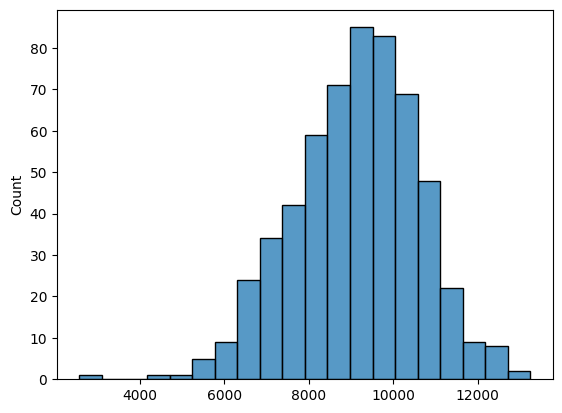

In [28]:
sns.histplot(genes_expressed_by_cell, bins=20)

## A closer look at Slc17a7

Let's take a closer look at the relationship between Slc17a7 count and dendrite number of tips

In [29]:
morph_data.columns

Index(['axon.total_length', 'all_neurites.total_length',
       'basal_dendrite.total_length', 'dendrite.total_length',
       'dendrite.total_surface_area', 'axon.total_surface_area',
       'all_neurites.total_surface_area', 'basal_dendrite.total_surface_area',
       'dendrite.total_volume', 'axon.total_volume',
       'all_neurites.total_volume', 'basal_dendrite.total_volume',
       'dendrite.num_tips', 'axon.num_tips', 'all_neurites.num_tips',
       'basal_dendrite.num_tips', 'dendrite.num_nodes', 'axon.num_nodes',
       'all_neurites.num_nodes', 'basal_dendrite.num_nodes',
       'dendrite.num_branches', 'axon.num_branches',
       'all_neurites.num_branches', 'basal_dendrite.num_branches'],
      dtype='object')

<Axes: xlabel='Slc17a7', ylabel='dendrite.num_tips'>

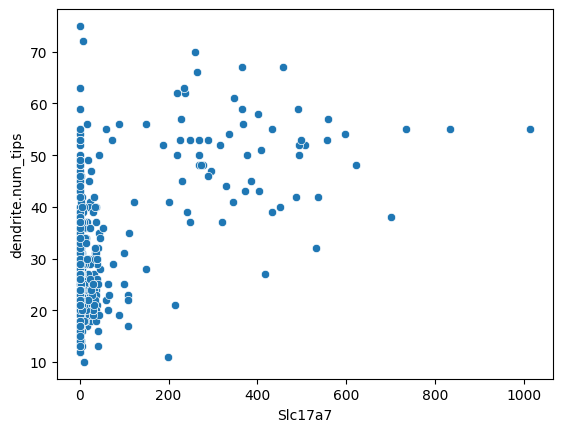

In [32]:
# Slc17a7 count is our independent variable, so it goes on x axis by convention
sns.scatterplot(data=cell_data, x='Slc17a7', y='dendrite.num_tips')

<Axes: xlabel='Arpp21', ylabel='dendrite.num_tips'>

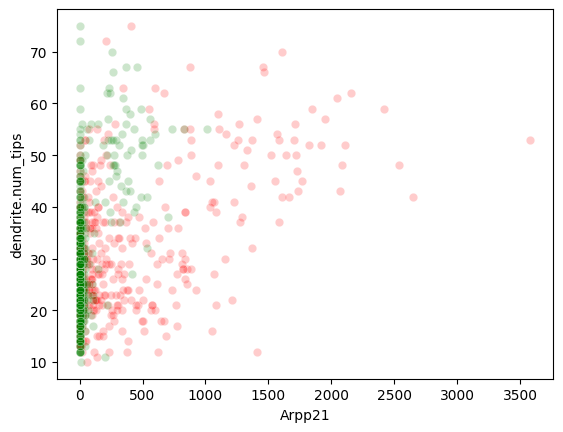

In [55]:
sns.scatterplot(data=cell_data, x='Arpp21', y='dendrite.num_tips', color='red', alpha=0.2)
sns.scatterplot(data=cell_data, x='Slc17a7', y='dendrite.num_tips', color='green', alpha=0.2)


## Matthew's parts per million discovery

In [65]:
expression_avg = gene_data.sum(axis='columns')
expression_avg

cell_specimen_id
601506507    1000000.0
601790961    1000000.0
601803754    1000000.0
601808698    1000000.0
601810307    1000000.0
               ...    
963055521    1000000.0
963063283    1000000.0
992386952    1000000.0
992268582    1000000.0
992830261    1000000.0
Length: 573, dtype: float64

In [64]:
expression_avg.describe()

count    5.730000e+02
mean     1.000000e+06
std      2.052215e-08
min      1.000000e+06
25%      1.000000e+06
50%      1.000000e+06
75%      1.000000e+06
max      1.000000e+06
dtype: float64

Discovery: It really is parts per million -- our expression count is proportional to the total amount of RNA expressed in the cell

(amount of RNA for specific gene / amount of overall RNA)*1,000,000